In [1]:
import pandas as pd
import nltk
import re
import numpy as np
from scipy.sparse import csr_matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
df = pd.read_csv('elis-regina_raw.csv')

In [6]:
df

,titulo,mais tocada,letra,compositor
0,"1,2,3 Balançou",0,"1,2,3, balançou 1,2,3, o meu samba eu quero as...",alcyr pires vermelho
1,20 Anos Blues,0,Ontem de manhã quando acordei Olhei a vida e m...,sueli costa / vitor martins
2,A Banca do Distinto,0,"Não fala com pobre, não dá mão a preto Não car...",billy blanco
3,A Corujinha,0,"Corujinha, corujinha, Que peninha de você. Fic...",toquinho / vinicius de moraes
4,A Dama do Apocalipse,0,Branco por cima e o negro de um sorriso herói ...,nathan marques
...,...,...,...,...
381,Yesterday,0,Yesterday All my troubles seemed so far away N...,the beatles
382,Zambi,0,"É Zambi na noite Ei,Ei, é ZAmbi É Zambi, tue, ...",tetes raides / vinicius de moraes
383,Zazueira,0,Ela vem chegando E feliz vou esperando A esper...,jorge ben
384,Zé Não É João,0,"Pra que que eu fui telefonar, pra quê? Pra que...",ciro monteiro


In [7]:
list(zip(df['titulo'],df['letra']))[0:3]

[('1,2,3 Balançou',
  '1,2,3, balançou 1,2,3, o meu samba eu quero assim Requebra e vai por mim </p>1,2,3, vai não vai 1,2,3, ouve o prato a marcar  O nosso balançar</p>Faz um passo todo figurado E segue o rebolado A onda do balanço me enrolou</p>Eu não posso parar Vejo o tempo correr sem me cansar Você pode notar</p>Batam palmas para quem gostou Do meu samba que a ninguém negou</p>De todo o coração Sensação Enquanto balançou</p>'),
 ('20 Anos Blues',
  'Ontem de manhã quando acordei Olhei a vida e me espantei Eu tenho mais de vinte anos E eu tenho mais de mil perguntas sem respostas Estou ligada num futuro blue </p>Os meus pais nas minhas costas As raízes na marquise Eu tenho mais de vinte muros O sangue jorra pelos furos, pelas veias de um jornal Eu não te quero, eu te quero mal</p>Essa calma que inventei, bem sei Custou as contas que contei Eu tenho mais de vinte anos E eu quero as cores e os colírios, meus delírios Estou ligada num futuro blue</p>Os meus pais nas minhas costas As r

# Contagem de palavras

In [9]:
df['letra'] = [str(letra).replace('</p>',' ') for letra in df['letra']]
df['tamanho'] = [len(str(letra).split()) for letra in df['letra']]

In [10]:
df.sort_values(by='tamanho', ascending=False).head()

,titulo,mais tocada,letra,compositor,tamanho
205,Medley Falso Brilhante,0,"(Música desconhecida) Já fui pobre, já fui jor...",nao identificado,512
17,Águas de Março,1,"É pau, é pedra É o fim do caminho É um resto d...",antonio carlos jobim,399
252,O Morro Não Tem Vez/Feio Não É Bonito/Samba Do...,0,O morro não tem vez E o que ele fez já foi dem...,antonio carlos jobim / carlos lyra / rey guerr...,383
26,Amor Até o Fim,0,Amor não tem que se acabar Eu quero e sei que ...,gilberto gil,331
300,Roda,0,"Meu povo, preste atenção na roda que eu te fiz...",gilberto gil / joao augusto,327


In [11]:
df.sort_values(by='tamanho', ascending=True).head()

,titulo,mais tocada,letra,compositor,tamanho
41,As Curvas da Estrada de Santos,0,nan,nao identificado,1
24,Amante À Moda Antiga,0,nan,nao identificado,1
369,Verão Vermelho,0,[música não tem letra],nonato buzar,4
259,O Sol Nascerá (A Sorrir),0,A sorrir eu pretendo levar a vida Pois choran...,cartola / elton medeiros,30
269,Outro Cais,0,Me atraiu o teu encanto Respirei o teu ar Te...,duca leal / marilton borges,33


<AxesSubplot:xlabel='tamanho', ylabel='titulo'>

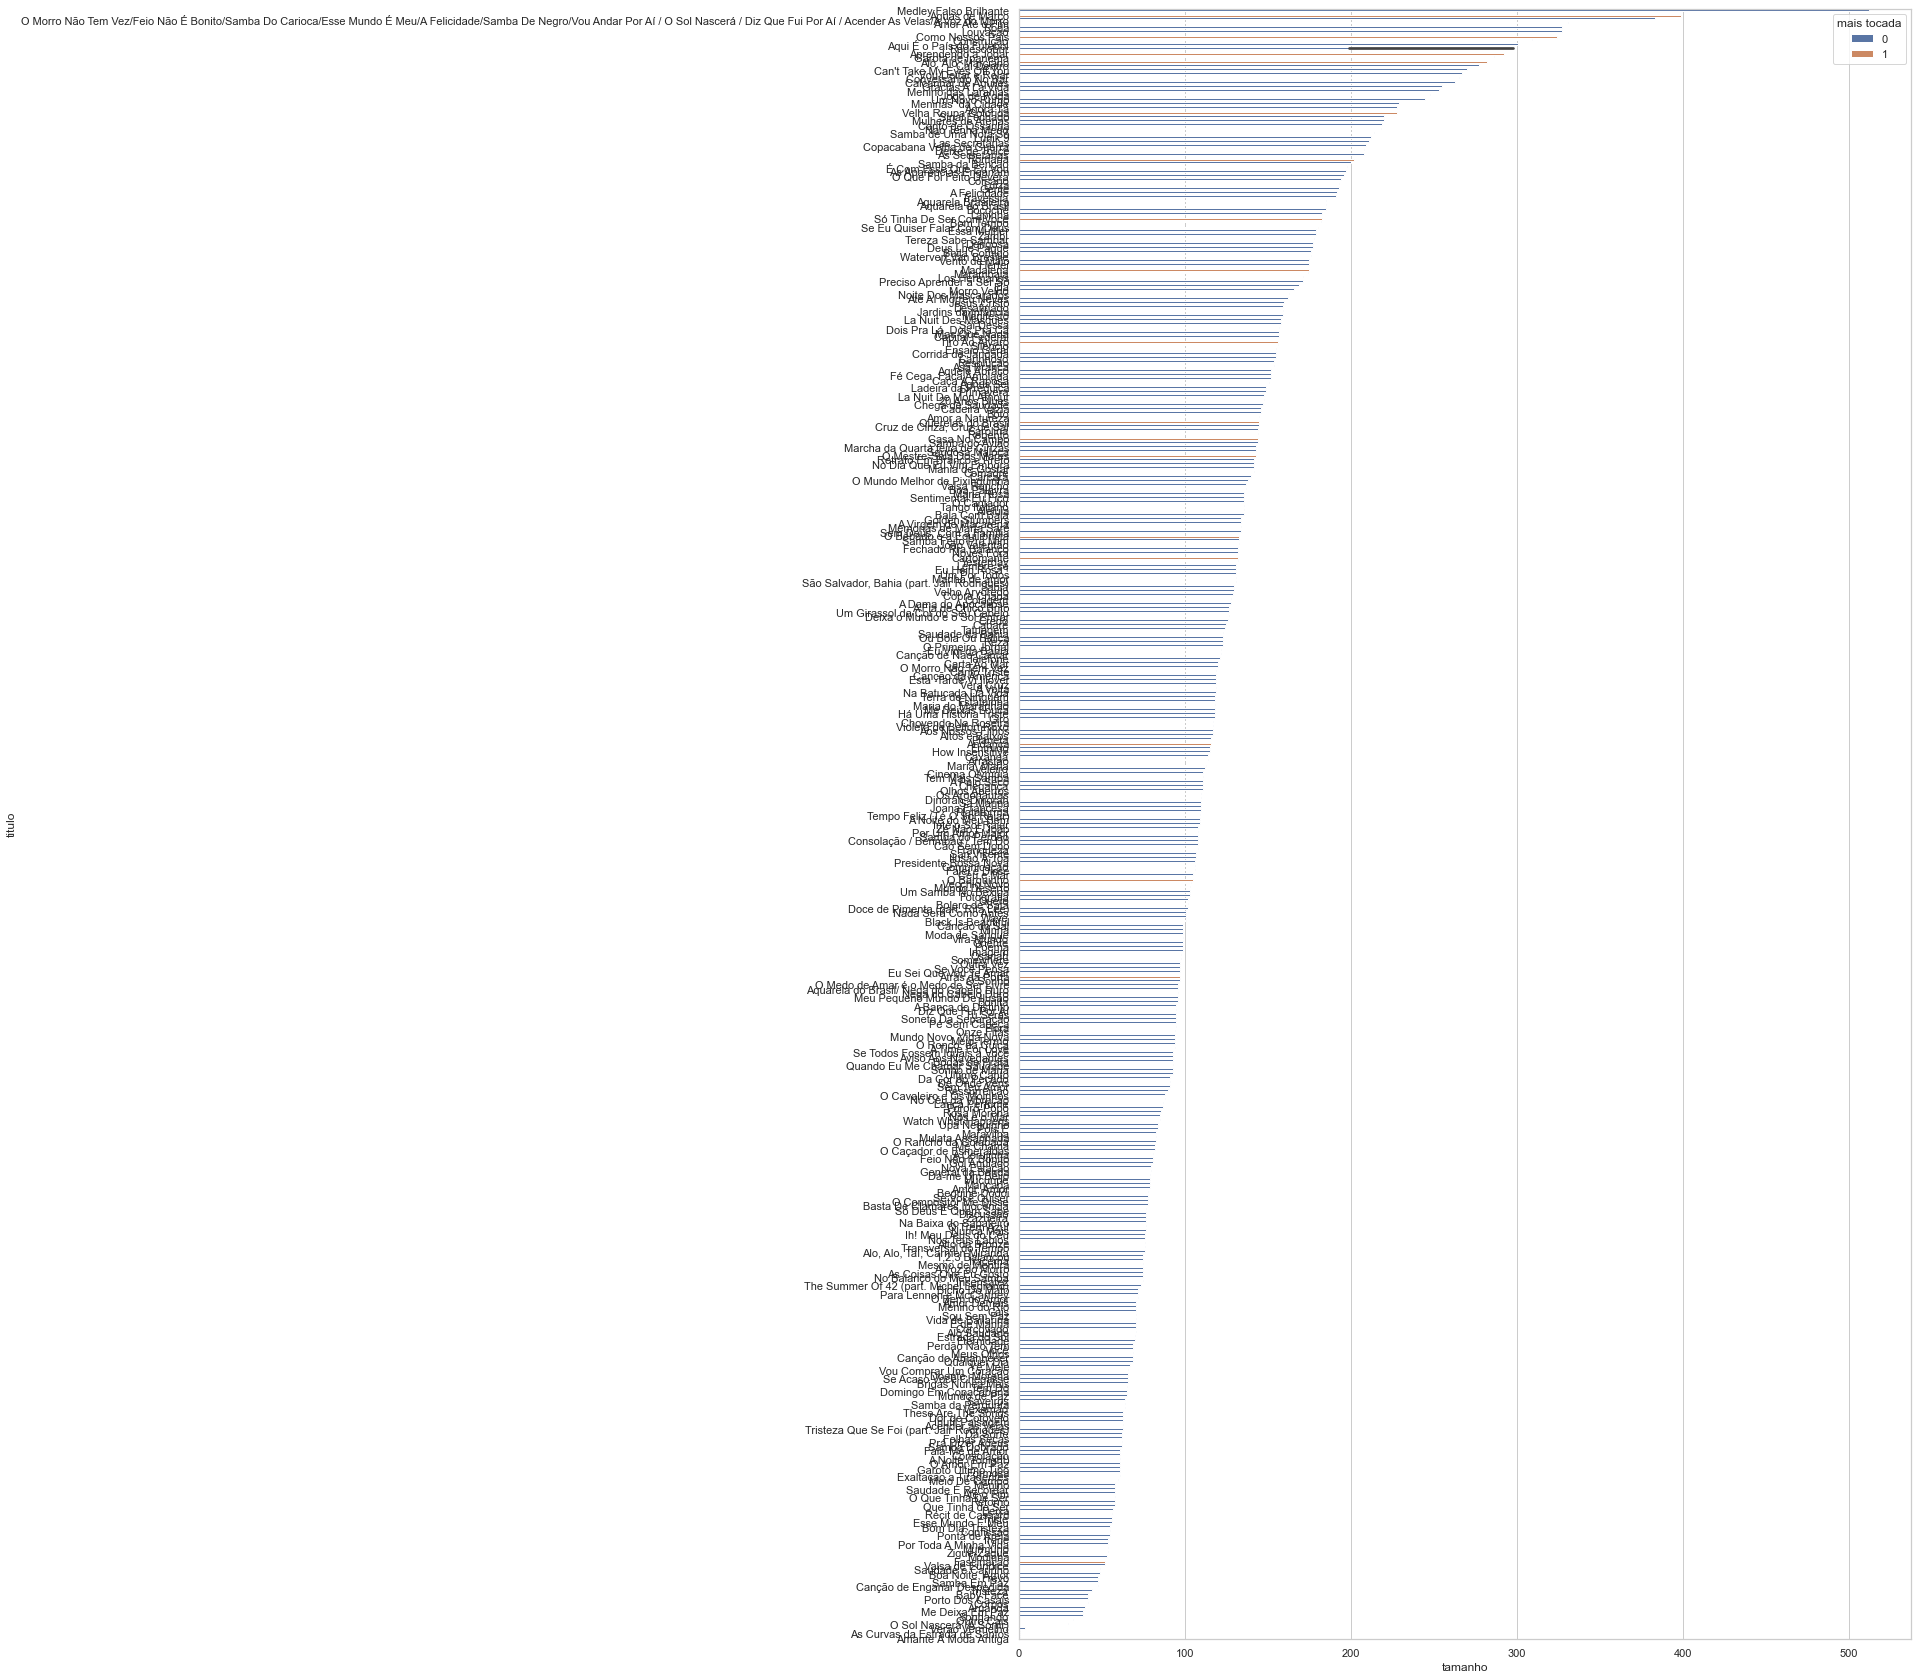

In [13]:
sns.set(style="whitegrid")
plt.figure(figsize=(16, 30))
sns.barplot(y="titulo", x="tamanho", hue="mais tocada", data=df.sort_values(by='tamanho', ascending=False))

C:\Users\lucas.carneiro\Anaconda3\envs\env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='tamanho'>

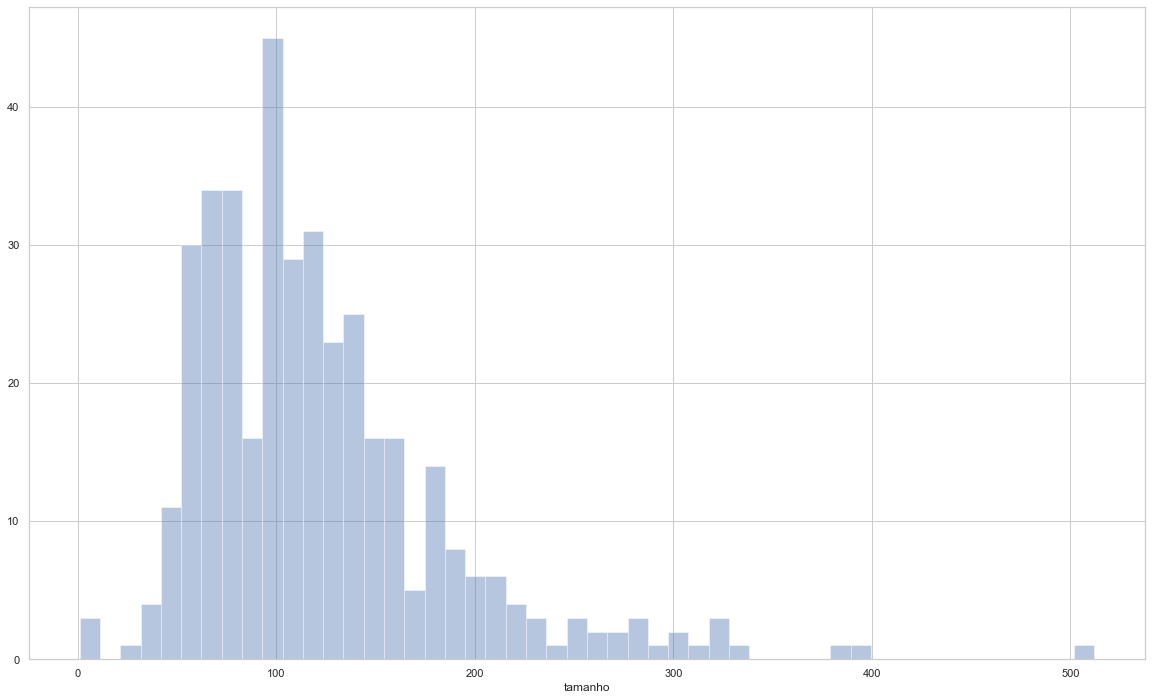

In [14]:
plt.figure(figsize=(20, 12))
sns.distplot(df['tamanho'], kde = False, bins = 50)

# Termos mais frequentes

## Remover stopwords

In [35]:
stopwords_pt = []
with open('stopwords.txt') as f:
       for line in f:
            line = line.replace(' ','')
            line = line.replace('\n','')
            stopwords_pt.append(line)
stopwords_pt.append('pra')
stopwords_pt.append('e')
stopwords_pt.append('é')
stopwords_pt.append('oh')
stopwords_pt.append('ô')
stopwords_pt.append('ah')
stopwords_pt.append('la')
stopwords_pt.append('lá')
stopwords_pt.append('uns')
stopwords_pt.append('eh')
stopwords_pt.append('n')
stopwords_pt.append('ai')
stopwords_pt.append('ie')
stopwords_pt.append('u')
stopwords_pt.append('yeh')
print(stopwords_pt)

['de', 'a', 'o', 'que', 'e', 'do', 'da', 'em', 'um', 'para', 'Ã©', 'com', 'nÃ£o', 'uma', 'os', 'no', 'se', 'na', 'por', 'mais', 'as', 'dos', 'como', 'mas', 'foi', 'ao', 'ele', 'das', 'tem', 'Ã\xa0', 'seu', 'sua', 'ou', 'ser', 'quando', 'muito', 'hÃ¡', 'nos', 'jÃ¡', 'estÃ¡', 'eu', 'tambÃ©m', 'sÃ³', 'pelo', 'pela', 'atÃ©', 'isso', 'ela', 'entre', 'era', 'depois', 'sem', 'mesmo', 'aos', 'ter', 'seus', 'quem', 'nas', 'me', 'esse', 'eles', 'estÃ£o', 'vocÃª', 'tinha', 'foram', 'essa', 'num', 'nem', 'suas', 'meu', 'Ã\xa0s', 'minha', 'tÃªm', 'numa', 'pelos', 'elas', 'havia', 'seja', 'qual', 'serÃ¡', 'nÃ³s', 'tenho', 'lhe', 'deles', 'essas', 'esses', 'pelas', 'este', 'fosse', 'dele', 'tu', 'te', 'vocÃªs', 'vos', 'lhes', 'meus', 'minhas', 'teu', 'tua', 'teus', 'tuas', 'nosso', 'nossa', 'nossos', 'nossas', 'dela', 'delas', 'esta', 'estes', 'estas', 'aquele', 'aquela', 'aqueles', 'aquelas', 'isto', 'aquilo', 'estou', 'estÃ¡', 'estamos', 'estÃ£o', 'estive', 'esteve', 'estivemos', 'estiveram', 'esta

In [36]:
# stopwords em inglês
from nltk.corpus import stopwords

# You will have to download the set of stop words the first time
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lucas.carneiro\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [37]:
stopwords_en = stopwords.words('english')
print(stopwords_en)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

## Limpeza e Normalização

In [38]:
import string
def normalize_text(txt):    
    txt = txt.replace('</p>','')
    for p in string.punctuation:
        txt.replace(p,'')
    return txt

### Todas as letras em uma lista, removendo stopwords e normalizando

In [39]:
todas_letras = ' '.join(list(df['letra']))
todas_letras = normalize_text(todas_letras)
todas_letras

'1,2,3, balançou 1,2,3, o meu samba eu quero assim Requebra e vai por mim  1,2,3, vai não vai 1,2,3, ouve o prato a marcar  O nosso balançar Faz um passo todo figurado E segue o rebolado A onda do balanço me enrolou Eu não posso parar Vejo o tempo correr sem me cansar Você pode notar Batam palmas para quem gostou Do meu samba que a ninguém negou De todo o coração Sensação Enquanto balançou  Ontem de manhã quando acordei Olhei a vida e me espantei Eu tenho mais de vinte anos E eu tenho mais de mil perguntas sem respostas Estou ligada num futuro blue  Os meus pais nas minhas costas As raízes na marquise Eu tenho mais de vinte muros O sangue jorra pelos furos, pelas veias de um jornal Eu não te quero, eu te quero mal Essa calma que inventei, bem sei Custou as contas que contei Eu tenho mais de vinte anos E eu quero as cores e os colírios, meus delírios Estou ligada num futuro blue Os meus pais nas minhas costas As raízes na marquise Eu tenho mais de vinte muros O sangue jorra pelos furos,

In [40]:
len(todas_letras)

242576

## Tokenização

In [41]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lucas.carneiro\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [42]:
#tokeniza
from nltk import tokenize    
palavras= tokenize.word_tokenize(todas_letras, language='portuguese')
print(palavras[0:20])

['1,2,3', ',', 'balançou', '1,2,3', ',', 'o', 'meu', 'samba', 'eu', 'quero', 'assim', 'Requebra', 'e', 'vai', 'por', 'mim', '1,2,3', ',', 'vai', 'não']


In [43]:
#remove stopwords
from string import punctuation
stopwords = set(stopwords_pt + list(punctuation) + stopwords_en)
tokens = [palavra for palavra in palavras if palavra not in stopwords]
print(tokens[0:20])

['1,2,3', 'balançou', '1,2,3', 'samba', 'quero', 'assim', 'Requebra', 'vai', 'mim', '1,2,3', 'vai', 'não', 'vai', '1,2,3', 'ouve', 'prato', 'marcar', 'O', 'balançar', 'Faz']


## Keywords

In [44]:
from collections import Counter
def get_keywords(text, n):
    text = normalize_text(text)
    stopwords = set(stopwords_pt + list(punctuation) + stopwords_en)
    palavras= tokenize.word_tokenize(text, language='portuguese')
    tokens = [palavra for palavra in palavras if palavra not in stopwords]
    keywords = Counter(tokens).most_common(n)
    return keywords    

In [45]:
get_keywords(df['letra'][0],3)[0][0]

'1,2,3'

In [46]:
keywords = []
for letra in list(df['letra']):
    top = get_keywords(letra,3)
    kw = ''
    for tup in top:        
        kw = kw + tup[0] + ', '
    kw = kw[0:-2]
    keywords.append(kw)
        

In [47]:
df['keywords'] = keywords
df.head()

,titulo,mais tocada,letra,compositor,tamanho,keywords
0,"1,2,3 Balançou",0,"1,2,3, balançou 1,2,3, o meu samba eu quero as...",alcyr pires vermelho,75,"1,2,3, vai, balançou"
1,20 Anos Blues,0,Ontem de manhã quando acordei Olhei a vida e m...,sueli costa / vitor martins,148,"Eu, vinte, quero"
2,A Banca do Distinto,0,"Não fala com pobre, não dá mão a preto Não car...",billy blanco,95,"Não, Pra, doutor"
3,A Corujinha,0,"Corujinha, corujinha, Que peninha de você. Fic...",toquinho / vinicius de moraes,81,"Corujinha, Que, você"
4,A Dama do Apocalipse,0,Branco por cima e o negro de um sorriso herói ...,nathan marques,128,"vida, E, mente"


## Distribuição de frequências

In [48]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
fdist = FreqDist()
for word in tokens:
    fdist[word.lower()] += 1

In [49]:
df_freq = pd.DataFrame(list(fdist.items()), columns = ["termo","frequencia"])
df_freq.sort_values(by='frequencia', ascending=False).head(10)

,termo,frequencia
8,não,745
18,e,644
132,que,378
198,amor,367
6,vai,321
32,você,298
12,o,292
263,é,277
21,a,251
342,vou,246


In [50]:
df_freq.sort_values(by='frequencia', ascending=True).head(10)

,termo,frequencia
6282,ziguezaguiando,1
3515,cansados,1
3516,elos,1
3517,anduve,1
3518,ciudades,1
3519,charcos,1
3520,playas,1
3521,desiertos,1
3522,montanias,1
3523,llanos,1


<AxesSubplot:xlabel='frequencia', ylabel='termo'>

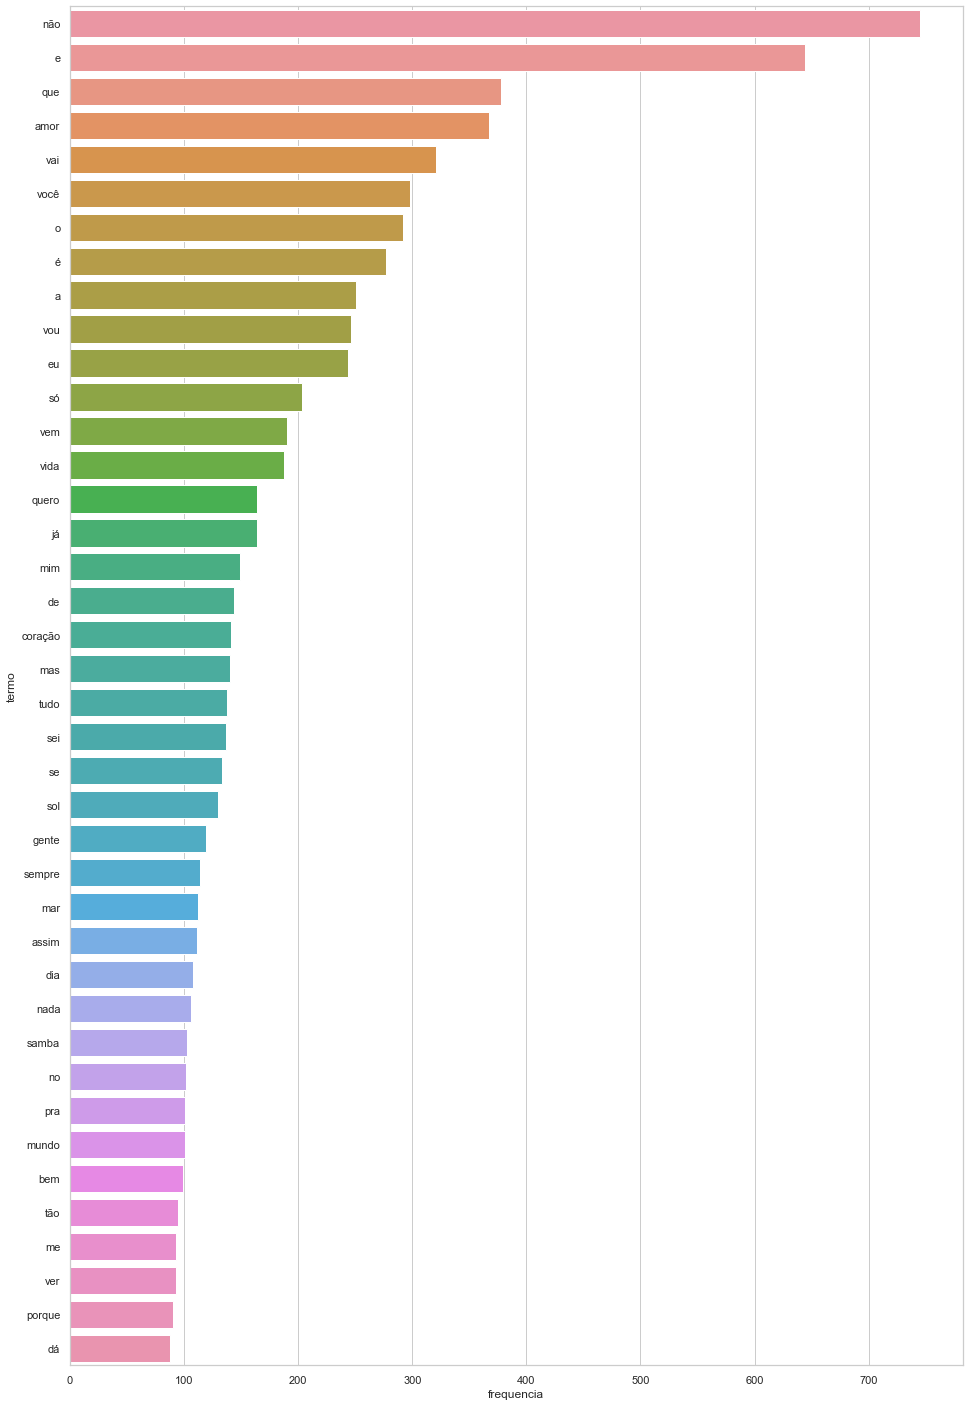

In [51]:
plt.figure(figsize=(16, 25))
sns.barplot(y="termo", x="frequencia", data=df_freq.sort_values(by='frequencia', ascending=False).head(40))

## Wordcloud

In [52]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

ModuleNotFoundError: No module named 'wordcloud'

In [53]:
todas_keywords = ''
for keyword in list(df['keywords']):
    todas_keywords += keyword + ', '
todas_keywords = todas_keywords[0:-2]
todas_keywords

"1,2,3, vai, balançou, Eu, vinte, quero, Não, Pra, doutor, Corujinha, Que, você, vida, E, mente, A, felicidade, Tristeza, caso, já, oito, noite, amor, A, quero, bem, Para, Belchior, você, De, time, A, weather, virgem, santa, Que, solidão, Me, quero, samba, Eu, voz, não, Não, E, Ê, ê, não, tá, não, Se, É, fim, vida, não, vai, mar, No, prescrito, E, society, Down, high, cai, Cai, É, Alto, Bronze, Praça, demais, altos, O, nan, Que, Paulinho, Viola, Até, não, vou, Vem, vem, amor, amor, Amor, Quero, Me, mão, andei, Perdoem, falta, E, dig, aprendendo, jogar, E, Brasil, De, Brasil, Ô, mim, Brasil, mim, Qual, abraço, Alô, Rio, fica, A, Brasil, Eh, mar, arrastão, vai, Vai, vem, há, As, aparências, você, coisas, sorriso, nan, cha, chá, Cha, Eu, coração, não, pa, vai, malandro, A, gente, crescer, E, No, Pra, Quem, dá, sabe, Baby, face, Esse, sol, banho, E, E, bala, sempre, Basta, Não, mal, não, Olha, bem, Bicho, mato, Devagar, beautiful, Black, black, amor, Boa, noite, sozinho, Aprendeu, chão, É,

In [123]:
wordcloud = WordCloud(stopwords = stopwords, background_color="white",width = 800, height = 600).generate(todas_letras)
wordcloud.to_file("wordcloud.png")

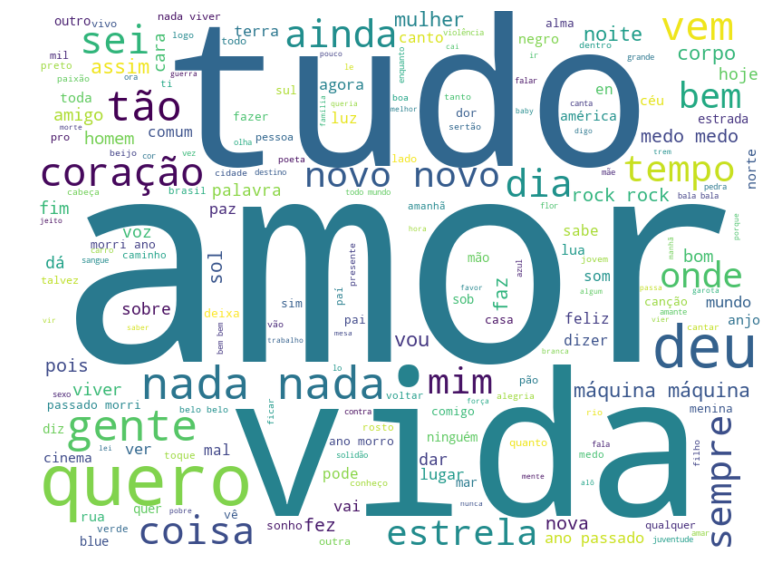

In [124]:
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Identificando as músicas onde os tokens ocorrem

In [125]:
musicas = []
for palavra in df_freq['termo']:
    musicas_de_palavra = ''
    for letra, titulo in zip(df['letra'],df['titulo']):
        letra = letra.lower()
        if palavra in letra:
            musicas_de_palavra += titulo + ', '
    musicas_de_palavra = musicas_de_palavra[0:-2]
    musicas.append(musicas_de_palavra)        

In [126]:
df_freq['musicas'] = musicas
df_freq.head(10)

,termo,frequencia,musicas
0,vier,7,"A Palo Seco, Cuidar do Homem, Os Derradeiros M..."
1,perguntar,1,"A Palo Seco, Baihuno"
2,onde,31,"A Palo Seco, Arte Final, Baihuno, Bel Prazer, ..."
3,andei,3,"A Palo Seco, Balada de Madame Frigidaire, Bel ..."
4,tempo,33,"A Palo Seco, Baihuno, Bossa Em Palavrões, Caso..."
5,sonhava,2,"A Palo Seco, Num País Feliz"
6,olhos,4,"A Palo Seco, Fotografia 3X4, Paraíso, Princesa..."
7,abertos,1,A Palo Seco
8,direi,3,"A Palo Seco, Cuidar do Homem, Divina Comédia H..."
9,amigo,13,"A Palo Seco, Amor de Perdição, Apenas Um Rapaz..."


In [127]:
df_freq.sort_values(by='frequencia', ascending=False).head(10)

,termo,frequencia,musicas
113,nada,79,"Aguapé, Apenas Um Rapaz Latino Americano, Arte..."
222,amor,77,"Alucinação, Amor de Perdição, Amor e Crime, At..."
223,vida,73,"Alucinação, Apenas Um Rapaz Latino Americano, ..."
287,tudo,68,"Amor e Crime, Apenas Um Rapaz Latino Americano..."
39,quero,61,"A Palo Seco, Balada do Amor, Bel Prazer, Brinc..."
537,novo,53,"Ate Mais Ver, Caso Comum de Trânsito, Clamor N..."
1688,medo,51,"De Primeira Grandeza, Kitsch Metropolitanus, M..."
36,bem,47,"A Palo Seco, Amor de Perdição, Arte Final, Bal..."
239,viver,37,"Amor de Perdição, Até Amanhã, Como Nossos Pais..."
446,vem,37,"Arte Final, Até Amanhã, Brasileiramente Linda,..."


In [128]:
df_freq.sort_values(by='frequencia', ascending=True).head()

,termo,frequencia,musicas
1535,dabo,1,Corpos Terrestres
1941,astro,1,"Canção de Gesta de Um Trovador Eletrônico, Esp..."
1942,poente,1,Espacial
1943,trigo,1,Espacial
1944,aparecer,1,Espacial


## Lemmatization

Download do modelo: https://github.com/explosion/spacy-models/releases/tag/pt_core_news_sm-2.2.5

ou

python -m spacy download pt

lemma = []
for token in nlp(todas_letras):
    lemma.append(token.lemma_ + "\t")

# nGramas

In [129]:
from nltk import ngrams
n = 2
#nGrams = ngrams(todas_letras.split(), n)
tokens_100 = [token for token in tokens if token in list(df_freq.sort_values(by='frequencia', ascending=False).head(10)['termo'])]
nGrams = ngrams(tokens, n)

In [130]:
nGrams

<generator object ngrams at 0x7f5d77a79390>

In [131]:
list_grams = []
for grams in nGrams:
    #print(grams[0])
    #grams = grams[0] + ' ' + grams[1]
    grams = ' '.join(list(grams))
    list_grams.append(grams.strip())
    
print(list_grams)

['vier perguntar', 'perguntar onde', 'onde andei', 'andei tempo', 'tempo sonhava', 'sonhava olhos', 'olhos abertos', 'abertos direi', 'direi amigo', 'amigo desesperava', 'desesperava sei', 'sei assim', 'assim falando', 'falando pensas', 'pensas desespero', 'desespero moda', 'moda 76', '76 ando', 'ando descontente', 'descontente desesperadamente', 'desesperadamente grito', 'grito português', 'português ando', 'ando descontente', 'descontente desesperadamente', 'desesperadamente grito', 'grito português', 'português vinte', 'vinte cinco', 'cinco anos', 'anos sonho', 'sonho sangue', 'sangue américa', 'américa sul', 'sul força', 'força deste', 'deste destino', 'destino tango', 'tango argentino', 'argentino vai', 'vai bem', 'bem melhor', 'melhor blues', 'blues sei', 'sei assim', 'assim falando', 'falando pensas', 'pensas desespero', 'desespero moda', 'moda 76', '76 quero', 'quero canto', 'canto torto', 'torto feito', 'feito faca', 'faca corte', 'corte carne', 'carne quero', 'quero canto', '

In [132]:
ngramfd = FreqDist()
for word in list_grams:
    ngramfd[word] += 1

In [133]:
ngramfd

FreqDist({'nada nada': 37, 'novo novo': 26, 'máquina máquina': 25, 'rock rock': 20, 'medo medo': 19, 'ano passado': 16, 'passado morri': 12, 'morri ano': 12, 'ano morro': 12, 'nada viver': 11, ...})

In [134]:
df_ngramfd = pd.DataFrame(list(ngramfd.items()), columns = ["ngram","frequencia"])
df_ngramfd.sort_values(by='frequencia', ascending=False).head(15)

,ngram,frequencia
129,nada nada,37
4595,novo novo,26
4304,máquina máquina,25
1646,rock rock,20
4680,medo medo,19
1889,ano passado,16
6760,ano morro,12
6759,morri ano,12
6758,passado morri,12
4735,nada viver,11


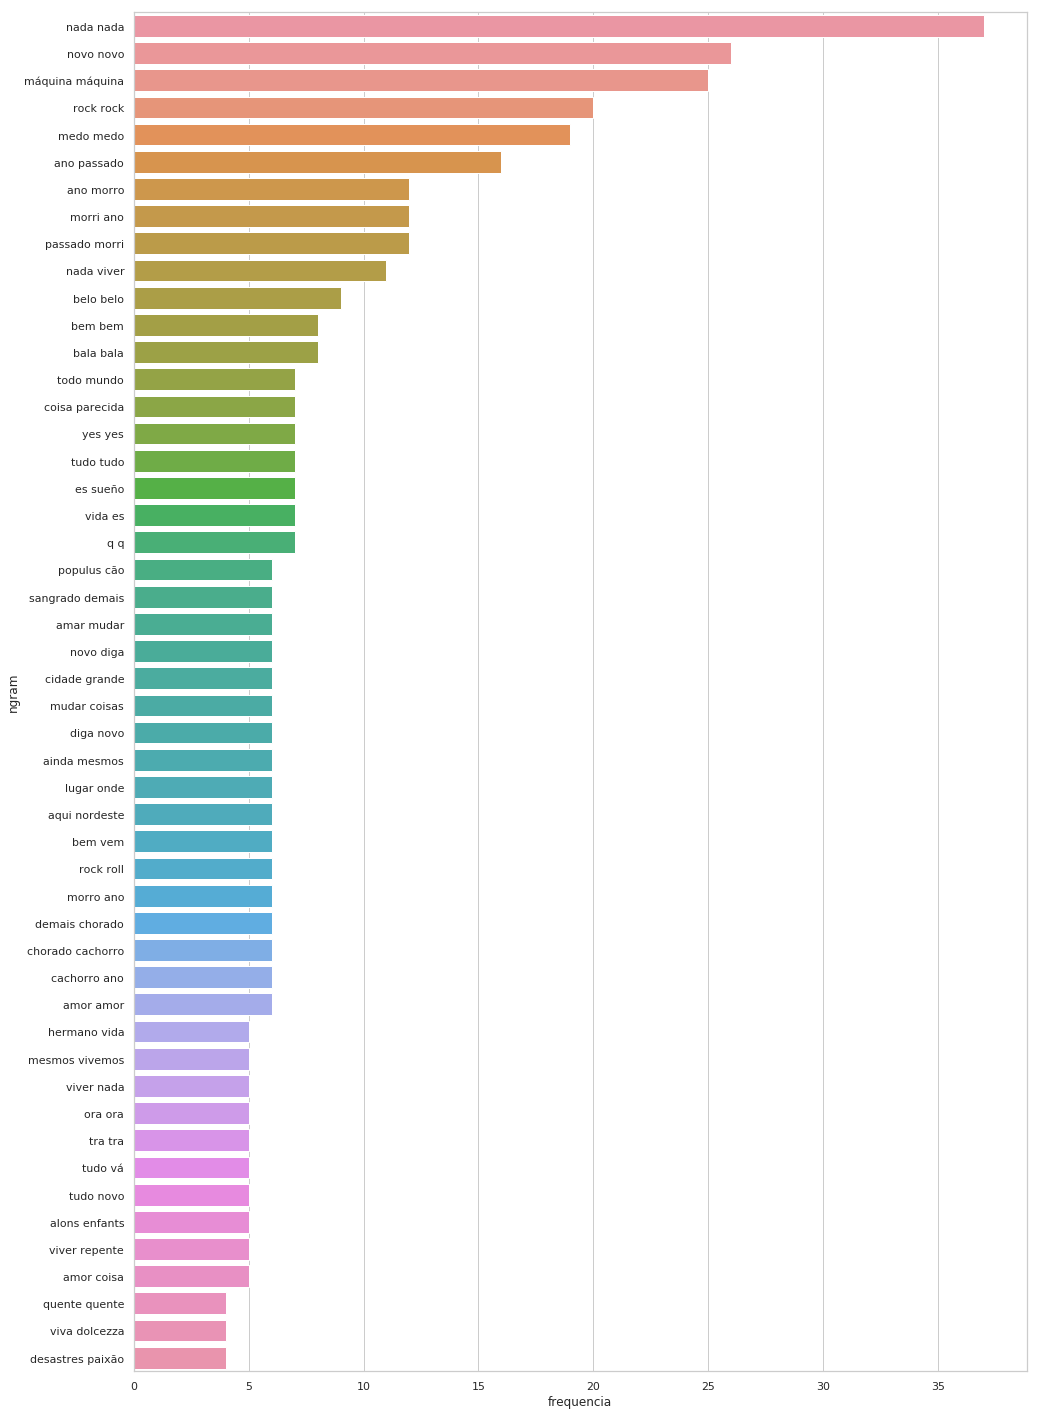

In [135]:
plt.figure(figsize=(16, 25))
sns.barplot(y="ngram", x="frequencia", data=df_ngramfd.sort_values(by='frequencia', ascending=False).head(50))

# Grafo de co-ocorrência

In [136]:
from nltk import bigrams
def generate_co_occurrence_matrix(corpus):
    #corpus = normalize_text(corpus)
    vocab = set(corpus)
    vocab = list(vocab)
    #vocab = vocab.difference(stopwords)
    #vocab = [word for word in list(vocab) if word not in stopwords]
    #vocab = [token for token in vocab if token in 
    #         list(df_freq.sort_values(by='frequencia', ascending=False).head(10)['termo'])]
    vocab_index = {word: i for i, word in enumerate(vocab)}
 
    # Create bigrams from all words in corpus
    bi_grams = list(bigrams(corpus))
 
    # Frequency distribution of bigrams ((word1, word2), num_occurrences)
    bigram_freq = nltk.FreqDist(bi_grams).most_common(len(bi_grams))
 
    # Initialise co-occurrence matrix
    # co_occurrence_matrix[current][previous]
    co_occurrence_matrix = np.zeros((len(vocab), len(vocab)))
 
    # Loop through the bigrams taking the current and previous word,
    # and the number of occurrences of the bigram.
    for bigram in bigram_freq:
        current = bigram[0][1]
        previous = bigram[0][0]
        count = bigram[1]
        pos_current = vocab_index[current]
        pos_previous = vocab_index[previous]
        co_occurrence_matrix[pos_current][pos_previous] = count
    co_occurrence_matrix = np.matrix(co_occurrence_matrix)
 
    # return the matrix and the index
    return co_occurrence_matrix, vocab_index

## Rede de co-ocorrência interativa

In [137]:
from pyvis.network import Network

In [138]:
#Create network plot 
bigram_df = df_ngramfd #df_ngramfd.sort_values(by='frequencia', ascending=False).head(100)
d = bigram_df.set_index('ngram').T.to_dict('records')
net = Network()
#net = Network(notebook = True,width = '800px',height = '600px')
toptokens = df_freq.sort_values(by='frequencia', ascending=False).head(50)

# Create connections between nodes
for index, row in toptokens.iterrows():               
    net.add_node(row['termo'], label=row['termo'], title = row['musicas'], 
                 value = row['frequencia'], color = 'steelblue')

for k, v in d[0].items():
    k = k.split()
    if(k[0] in list(toptokens['termo']) and k[1] in list(toptokens['termo'])):
        net.add_edge(k[0], k[1], weight= v)
        #print(k[0] + "," + k[1])



In [139]:
net.show_buttons(filter_=['physics'])
#net.save_graph('net_coocurrence.html')
net.show("mygraph.html")

# Similaridade entre músicas

In [140]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity 

In [141]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(list(df['letra']))
df_tdm = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names(), index = df['titulo'])
df_tdm.head()

,3x4,45,76,abacaxi,abaixo,abandona,abandonada,abandonados,abandonei,abandono,...,ídolo,ídolos,índia,índio,índios,íris,óculos,ópio,último,úteis
titulo,,,,,,,,,,,,,,,,,,,,,
A Palo Seco,0.0,0.0,0.196285,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
Aguapé,0.0,0.0,0.000000,0.0,0.0,0.0,0.048708,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
Alucinação,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
Amor de Perdição,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
Amor e Crime,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.112491


In [142]:
df_tdm.iloc[0].index

Index(['3x4', '45', '76', 'abacaxi', 'abaixo', 'abandona', 'abandonada',
       'abandonados', 'abandonei', 'abandono',
       ...
       'ídolo', 'ídolos', 'índia', 'índio', 'índios', 'íris', 'óculos', 'ópio',
       'último', 'úteis'],
      dtype='object', length=3535)

In [143]:
cosine_sim = cosine_similarity(X,X)

In [144]:
df_similar = pd.DataFrame(cosine_sim,columns = df['titulo'], index = df['titulo'])
df_similar.head(10)

titulo,A Palo Seco,Aguapé,Alucinação,Amor de Perdição,Amor e Crime,Apenas Um Rapaz Latino Americano,Arte Final,Até Amanhã,Ate Mais Ver,Baihuno,...,Senhoras do Amazonas,Sensual,Sujeito de Sorte,Tambor Tantã,Tocando Por Música,Todo Sujo de Batom,Tudo Outra Vez,Viva La Dolcezza,Voz da América,Ypê
titulo,,,,,,,,,,,,,,,,,,,,,
A Palo Seco,1.000000,0.027902,0.042774,0.058535,0.047133,0.132026,0.101326,0.027306,0.047725,0.124397,...,0.046398,0.112512,0.114555,0.126857,0.090991,0.182657,0.129905,0.022006,0.158540,0.049432
Aguapé,0.027902,1.000000,0.042920,0.076837,0.043495,0.211651,0.095615,0.004935,0.173596,0.077467,...,0.030498,0.053732,0.024322,0.056889,0.056819,0.049357,0.066272,0.015377,0.091281,0.049262
Alucinação,0.042774,0.042920,1.000000,0.056670,0.075335,0.096595,0.088817,0.017930,0.087178,0.083604,...,0.040298,0.078345,0.041372,0.069764,0.064296,0.076249,0.112549,0.021988,0.116845,0.027229
Amor de Perdição,0.058535,0.076837,0.056670,1.000000,0.128680,0.076233,0.069618,0.037304,0.079344,0.097338,...,0.066613,0.073106,0.032627,0.111421,0.074142,0.066550,0.092037,0.019572,0.154890,0.089934
Amor e Crime,0.047133,0.043495,0.075335,0.128680,1.000000,0.164756,0.092877,0.031301,0.066994,0.122411,...,0.064338,0.073298,0.032095,0.130133,0.063165,0.055136,0.110917,0.024850,0.136873,0.073796
Apenas Um Rapaz Latino Americano,0.132026,0.211651,0.096595,0.076233,0.164756,1.000000,0.141968,0.077071,0.122089,0.144871,...,0.056691,0.131954,0.116524,0.122183,0.154090,0.134506,0.174995,0.025043,0.167227,0.098677
Arte Final,0.101326,0.095615,0.088817,0.069618,0.092877,0.141968,1.000000,0.062220,0.081130,0.144903,...,0.038818,0.063885,0.041137,0.085364,0.106377,0.058578,0.117771,0.055632,0.118689,0.043758
Até Amanhã,0.027306,0.004935,0.017930,0.037304,0.031301,0.077071,0.062220,1.000000,0.018184,0.041688,...,0.023873,0.026491,0.020809,0.041271,0.021077,0.018843,0.082593,0.060838,0.022673,0.051115
Ate Mais Ver,0.047725,0.173596,0.087178,0.079344,0.066994,0.122089,0.081130,0.018184,1.000000,0.119299,...,0.068939,0.085652,0.024931,0.105197,0.045429,0.058149,0.049141,0.028897,0.095445,0.046069


In [145]:
df_similar.shape

(91, 91)

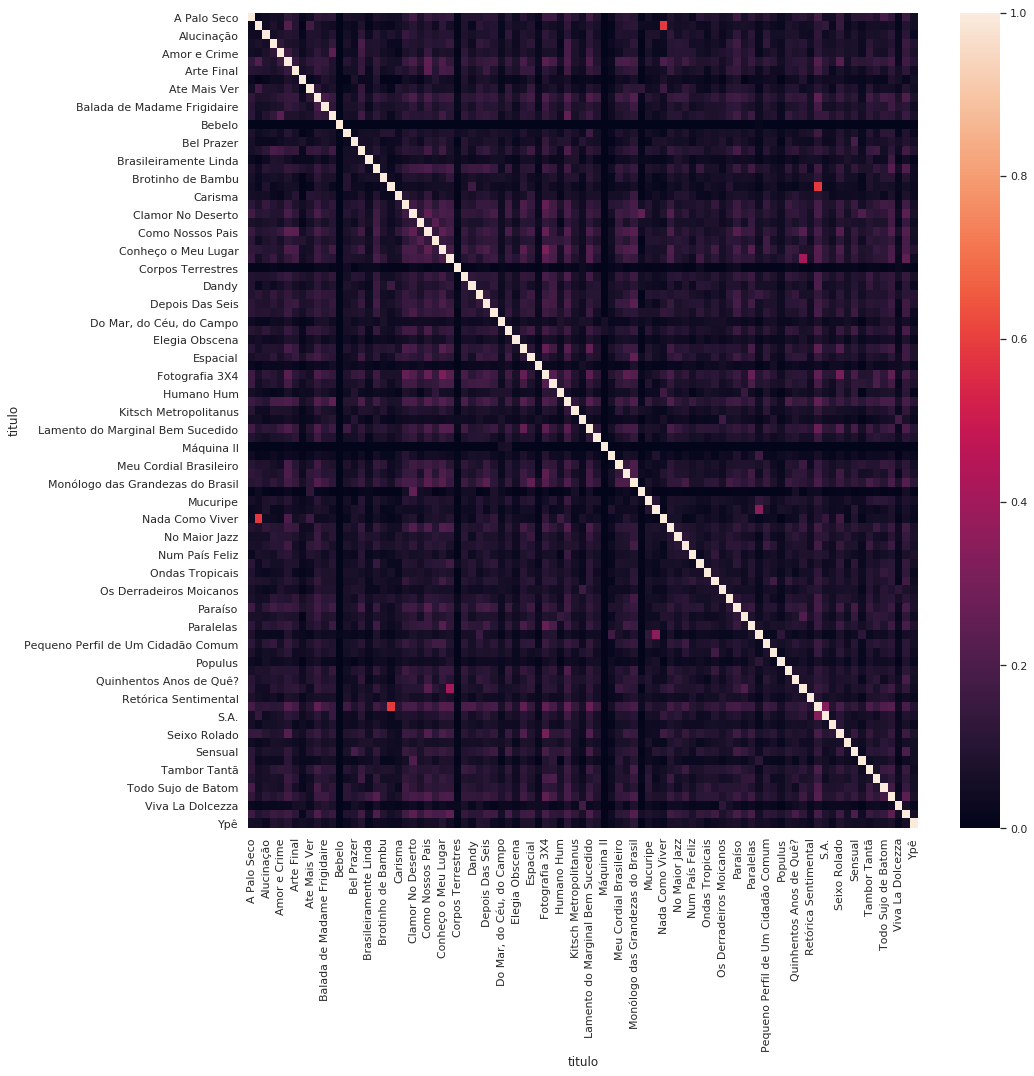

In [146]:
plt.figure(figsize=(15, 15))
sns.heatmap(df_similar, annot=False)

## Scatterplot

In [147]:
import umap
reducer = umap.UMAP()

In [148]:
embedding = reducer.fit_transform(df_tdm)
embedding.shape

(91, 2)

In [149]:
df_scatter = pd.DataFrame(embedding,index = df['titulo'], columns=['x','y'])

In [150]:
df_scatter.head()

,x,y
titulo,,
A Palo Seco,7.072263,-3.692765
Aguapé,6.900632,-5.588358
Alucinação,6.871804,-2.529769
Amor de Perdição,5.582899,-2.192232
Amor e Crime,5.220195,-2.353262


In [151]:
df['x'] = list(df_scatter['x'])
df['y'] = list(df_scatter['y'])
df.head()

,titulo,maisTocada,letra,tamanho,polaridade,subjetividade,sentimento,keywords,x,y
0,A Palo Seco,1,Se você vier me perguntar por onde andei No te...,195,-0.054545,0.463636,Neutro,"quero, canto, torto",7.072263,-3.692765
1,Aguapé,0,Capineiro de meu pai Não me cortes meus cabelo...,257,0.032345,0.354072,Neutro,"nada, sentada, estrada",6.900632,-5.588358
2,Alucinação,1,Eu não estou interessado Em nenhuma teoria Em ...,370,0.194898,0.600680,Positivo,"coisas, nenhuma, amar",6.871804,-2.529769
3,Amor de Perdição,0,"Entrar, ficar em ti Tem sido o meu melhor peri...",213,0.156212,0.514444,Positivo,"amor, paz, deixa",5.582899,-2.192232
4,Amor e Crime,0,"Amor, não há amor Existem só provas de amor Ma...",122,0.156944,0.661905,Positivo,"amor, tudo, provas",5.220195,-2.353262


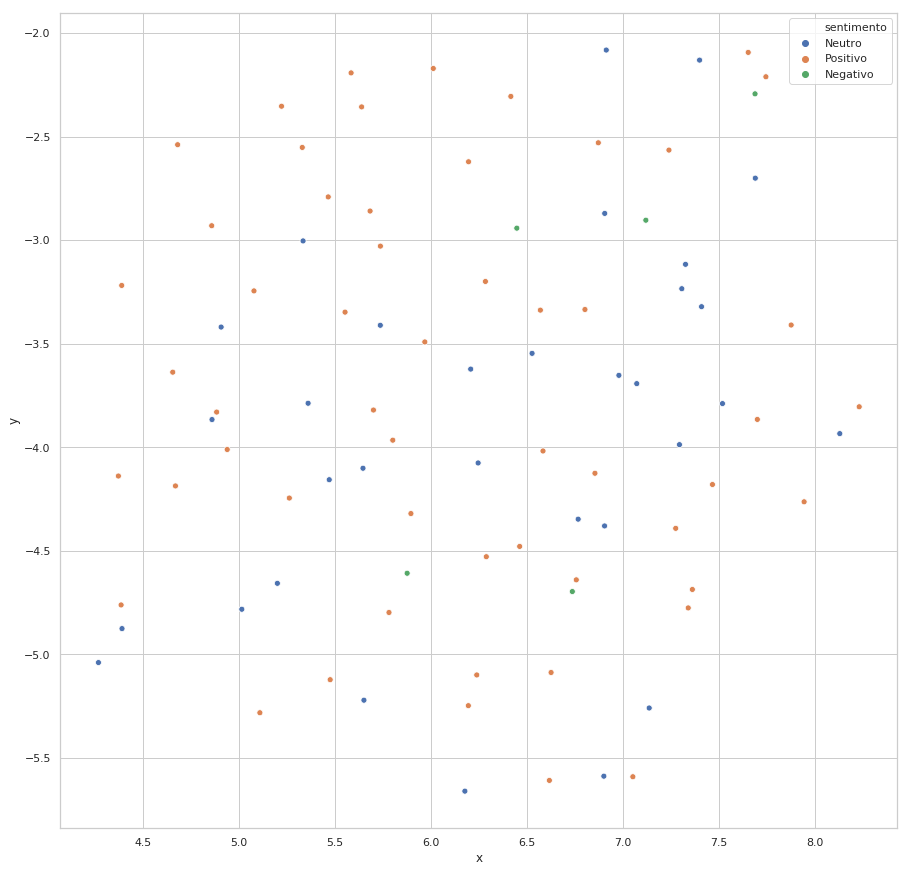

In [152]:
plt.figure(figsize=(15, 15))
sns.scatterplot(x="x", y="y", hue = 'sentimento', data=df)

https://python-graph-gallery.com/46-add-text-annotation-on-scatterplot/

# Análise de sentimento

In [153]:
from textblob import TextBlob

In [154]:
df['letra'][0]

'Se você vier me perguntar por onde andei No tempo em que você sonhava De olhos abertos, lhe direi Amigo, eu me desesperava  Sei que assim falando pensas Que esse desespero é moda em 76 Mas ando mesmo descontente Desesperadamente, eu grito em português Mas ando mesmo descontente Desesperadamente, eu grito em português Tenho vinte e cinco anos De sonho e de sangue E de América do Sul Por força deste destino Um tango argentino  Me vai bem melhor que um blues Sei que assim falando pensas Que esse desespero é moda em 76 E eu quero é que esse canto torto Feito faca, corte a carne de vocês E eu quero é que esse canto torto Feito faca, corte a carne de vocês Tenho vinte e cinco anos De sonho e de sangue E de América do Sul Por força deste destino Um tango argentino  Me vai bem melhor que um blues Sei que assim falando, pensas Que esse desespero é moda em 76 E eu quero é que esse canto torto Feito faca, corte a carne de vocês E eu quero é que esse canto torto Feito faca, corte a carne de vocês

In [155]:
palo_seco = TextBlob(df['letra'][0])
traducao = TextBlob(str(palo_seco.translate(to='en')))
traducao

TextBlob("If you come ask me where I've been In the days when you dreamed With your eyes open I'll tell you Friend I was desperate I know so speaking you think That despair is fashionable in 76 But I'm really displeased Desperately I scream in Portuguese But I really walk Desperately, I scream in Portuguese I'm twenty-five From dream and blood And from South America By virtue of this fate An Argentine tango Goes so much better than a blues I know that so you think That despair is fashionable in 76 And I I want is this crooked corner Made knife, cut your flesh And I want is this crooked corner Made knife, cut your flesh I'm twenty-five From dream and blood And from South America By force of this fate One Argentine tango Goes a lot better than a blues I know so to speak, you think That despair is fashionable in 76 And I want is that crooked corner Made knife, cut your flesh And I want is that crooked corner Made knife, cut your flesh")

In [156]:
traducao.sentiment

Sentiment(polarity=-0.033333333333333326, subjectivity=0.4416666666666666)

In [157]:
def get_polarity_subjectivity(text):
    lyric = TextBlob(text)
    if lyric.detect_language() != 'en':
        lyric = TextBlob(str(lyric.translate(to='en')))        
    polarity = lyric.polarity
    subjectivity = lyric.subjectivity
    return polarity, subjectivity

In [158]:
df.head()

,titulo,maisTocada,letra,tamanho,polaridade,subjetividade,sentimento,keywords,x,y
0,A Palo Seco,1,Se você vier me perguntar por onde andei No te...,195,-0.054545,0.463636,Neutro,"quero, canto, torto",7.072263,-3.692765
1,Aguapé,0,Capineiro de meu pai Não me cortes meus cabelo...,257,0.032345,0.354072,Neutro,"nada, sentada, estrada",6.900632,-5.588358
2,Alucinação,1,Eu não estou interessado Em nenhuma teoria Em ...,370,0.194898,0.600680,Positivo,"coisas, nenhuma, amar",6.871804,-2.529769
3,Amor de Perdição,0,"Entrar, ficar em ti Tem sido o meu melhor peri...",213,0.156212,0.514444,Positivo,"amor, paz, deixa",5.582899,-2.192232
4,Amor e Crime,0,"Amor, não há amor Existem só provas de amor Ma...",122,0.156944,0.661905,Positivo,"amor, tudo, provas",5.220195,-2.353262


In [159]:
df.describe()

,maisTocada,tamanho,polaridade,subjetividade,x,y
count,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000
mean,0.186813,177.109890,0.124177,0.502077,6.233318,-3.779747
std,0.391921,95.542132,0.167328,0.133715,1.027497,0.966860
min,0.000000,39.000000,-0.421795,0.000000,4.265648,-5.660648
25%,0.000000,115.500000,0.037266,0.424250,5.466342,-4.503705
50%,0.000000,149.000000,0.137500,0.508333,6.245228,-3.820284
75%,0.000000,214.500000,0.207425,0.571408,7.062082,-3.016171
max,1.000000,669.000000,0.850000,1.000000,8.231999,-2.081966


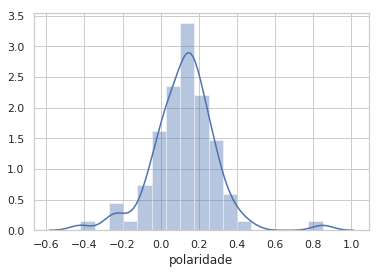

In [160]:
#plt.figure(figsize=(20, 12))
sns.distplot(df['polaridade'])

In [161]:
df[df['polaridade'] < 0].sort_values(by='polaridade', ascending=True)

,titulo,maisTocada,letra,tamanho,polaridade,subjetividade,sentimento,keywords,x,y
69,Pequeno Mapa do Tempo,1,Eu tenho medo e medo está por fora O medo anda...,210,-0.421795,0.772009,Negativo,"medo, belém, buscar",7.688861,-2.293343
36,Elegia Obscena,0,"Meu bem, admire o meu carro e goze sozinha, en...",133,-0.266654,0.527778,Negativo,"oooh, bed, saberá",6.736255,-4.696763
85,Tocando Por Música,0,Aluguei minha canção Pra pagar meu aluguel E u...,104,-0.237037,0.562963,Negativo,"pagar, dinheiro, anos",7.119605,-2.903656
78,S.A.,0,"Assaltantes, bêbados, índios Nordestinos retir...",133,-0.231921,0.400000,Negativo,"querem, onde, vem",5.875149,-4.608407
37,Em Resposta à Carta de Fã,0,"Baby, respondo enfim aquela carta de fã que vo...",141,-0.174369,0.689394,Negativo,"canção, ora, poema",6.446886,-2.942047
32,Depois Das Seis,0,"Quando a fábrica apitou e o trabalho terminou,...",146,-0.091364,0.355000,Neutro,"todo, vem, faz",6.905238,-2.870782
72,Populus,0,"Populus, meu cão... O escravo, indiferente, qu...",118,-0.089286,0.440476,Neutro,"populus, cão, sobre",7.690304,-2.700563
57,Não Leve Flores,0,"Não cante vitória muito cedo, não Nem leve flo...",172,-0.082500,0.650833,Neutro,"inimigo, sim, amigos",6.979126,-3.652750
47,Lira dos Vinte Anos,0,"Os filhos de Bob Dylan, clientes da Coca-cola ...",94,-0.062500,0.466667,Neutro,"filhos, bob, dylan",5.468922,-4.156755
0,A Palo Seco,1,Se você vier me perguntar por onde andei No te...,195,-0.054545,0.463636,Neutro,"quero, canto, torto",7.072263,-3.692765


In [162]:
print('Porcentagem de músicas negativas: ',len(df[df['polaridade'] < 0])/len(df))

Porcentagem de músicas negativas:  0.16483516483516483


In [163]:
df[df['polaridade'] >0.2].sort_values(by='polaridade', ascending=False)

,titulo,maisTocada,letra,tamanho,polaridade,subjetividade,sentimento,keywords,x,y
12,Bebelo,0,b be bel b belo be belo belo bel be...,73,0.850000,1.000000,Positivo,"belo, bala, b",7.653328,-2.093357
28,Corpos Terrestres,0,Osculetur me oscule oris suis Ideo adolescentu...,193,0.465278,0.739815,Positivo,"mea, est, mihi",4.387038,-3.218655
16,Brasileiramente Linda,0,"Olha-me, oh, yes! oh, yes! Brasileiramente lin...",146,0.400562,0.635705,Positivo,"yes, amor, brasileiramente",5.076476,-3.244959
49,Medo de Avião,0,Foi por medo de avião Que eu segurei Pela prim...,117,0.383333,0.523810,Positivo,"toque, medo, avião",7.745513,-2.210932
67,Paraíso (1982),0,"Graças a Deus, eu perco sempre o juízo Meu par...",86,0.362374,0.506061,Positivo,"palavra, paraíso, dá-lhe",6.194184,-5.247871
66,Paraíso,0,Amo tua voz e tua cor E teu jeito de fazer amo...,170,0.337143,0.598810,Positivo,"tudo, gente, faz",6.195220,-2.621459
62,Ondas Tropicais,0,Serviço de alto falante ``voz de cristal`` e `...,101,0.319792,0.587500,Positivo,"luz, brasil, mulato",5.800204,-3.965870
70,Pequeno Perfil de Um Cidadão Comum,1,Era um cidadão comum como esses que se vê na r...,157,0.293301,0.517484,Positivo,"feito, sempre, gente",7.877275,-3.409777
26,Conheço o Meu Lugar,1,O que é que pode fazer o homem comum Neste pre...,224,0.291731,0.428506,Positivo,"fazer, pessoa, homem",6.802137,-3.334789
81,Senhoras do Amazonas,0,"Rio, vim saber de ti e vi. Vi teu tropical sem...",93,0.289583,0.535000,Positivo,"rio, vim, saber",4.936986,-4.010879


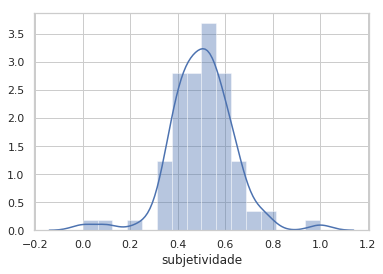

In [164]:
sns.distplot(df['subjetividade'])

In [165]:
df.sort_values(by='subjetividade', ascending=False).head()

,titulo,maisTocada,letra,tamanho,polaridade,subjetividade,sentimento,keywords,x,y
12,Bebelo,0,b be bel b belo be belo belo bel be...,73,0.850000,1.000000,Positivo,"belo, bala, b",7.653328,-2.093357
69,Pequeno Mapa do Tempo,1,Eu tenho medo e medo está por fora O medo anda...,210,-0.421795,0.772009,Negativo,"medo, belém, buscar",7.688861,-2.293343
90,Ypê,0,"Contemplo o rio, que corre parado E a dançarin...",126,0.052525,0.755556,Neutro,"pé, vede, ypê",5.332508,-3.003591
28,Corpos Terrestres,0,Osculetur me oscule oris suis Ideo adolescentu...,193,0.465278,0.739815,Positivo,"mea, est, mihi",4.387038,-3.218655
37,Em Resposta à Carta de Fã,0,"Baby, respondo enfim aquela carta de fã que vo...",141,-0.174369,0.689394,Negativo,"canção, ora, poema",6.446886,-2.942047


In [166]:
df.sort_values(by='subjetividade', ascending=True).head(10)

,titulo,maisTocada,letra,tamanho,polaridade,subjetividade,sentimento,keywords,x,y
48,Máquina II,0,ê mê e m e m e a m a q u i q u ...,116,0.000000,0.000000,Neutro,"máquina, q, ê",5.649803,-5.221463
42,Humano Hum,0,"Lavrar a palavra a pá, Como quem prepara um pã...",39,0.000000,0.100000,Neutro,"palavra, pão, lavrar",6.176095,-5.660648
7,Até Amanhã,0,Até amanhã Se o homem quiser - mesmo se chover...,82,0.053247,0.242857,Neutro,"amanhã, homem, quiser",8.130787,-3.934117
83,Sujeito de Sorte,1,Presentemente eu posso me considerar um sujeit...,288,0.099762,0.322857,Neutro,"ano, passado, morri",7.294784,-3.987406
19,Canção de Gesta de Um Trovador Eletrônico,0,O som do alto falante Rolava e me dava um toqu...,153,0.061389,0.325000,Neutro,"rock, som, mil",5.358737,-3.787562
1,Aguapé,0,Capineiro de meu pai Não me cortes meus cabelo...,257,0.032345,0.354072,Neutro,"nada, sentada, estrada",6.900632,-5.588358
32,Depois Das Seis,0,"Quando a fábrica apitou e o trabalho terminou,...",146,-0.091364,0.355000,Neutro,"todo, vem, faz",6.905238,-2.870782
52,Monólogo das Grandezas do Brasil,0,Todo mundo sabe/todo mundo vê Que tenho sido a...,235,0.091863,0.358772,Neutro,"bom, mundo, todo",4.857739,-3.866213
84,Tambor Tantã,0,"Doutor em dor, bate o tambor, Tantã de tanto d...",150,0.279596,0.360784,Positivo,"fim, vier, tão",4.881910,-3.830101
88,Viva La Dolcezza,0,"Daqui da zona fantasma, te mando minha lagrima...",53,0.056818,0.372222,Neutro,"viva, dolcezza, daqui",4.388510,-4.875677


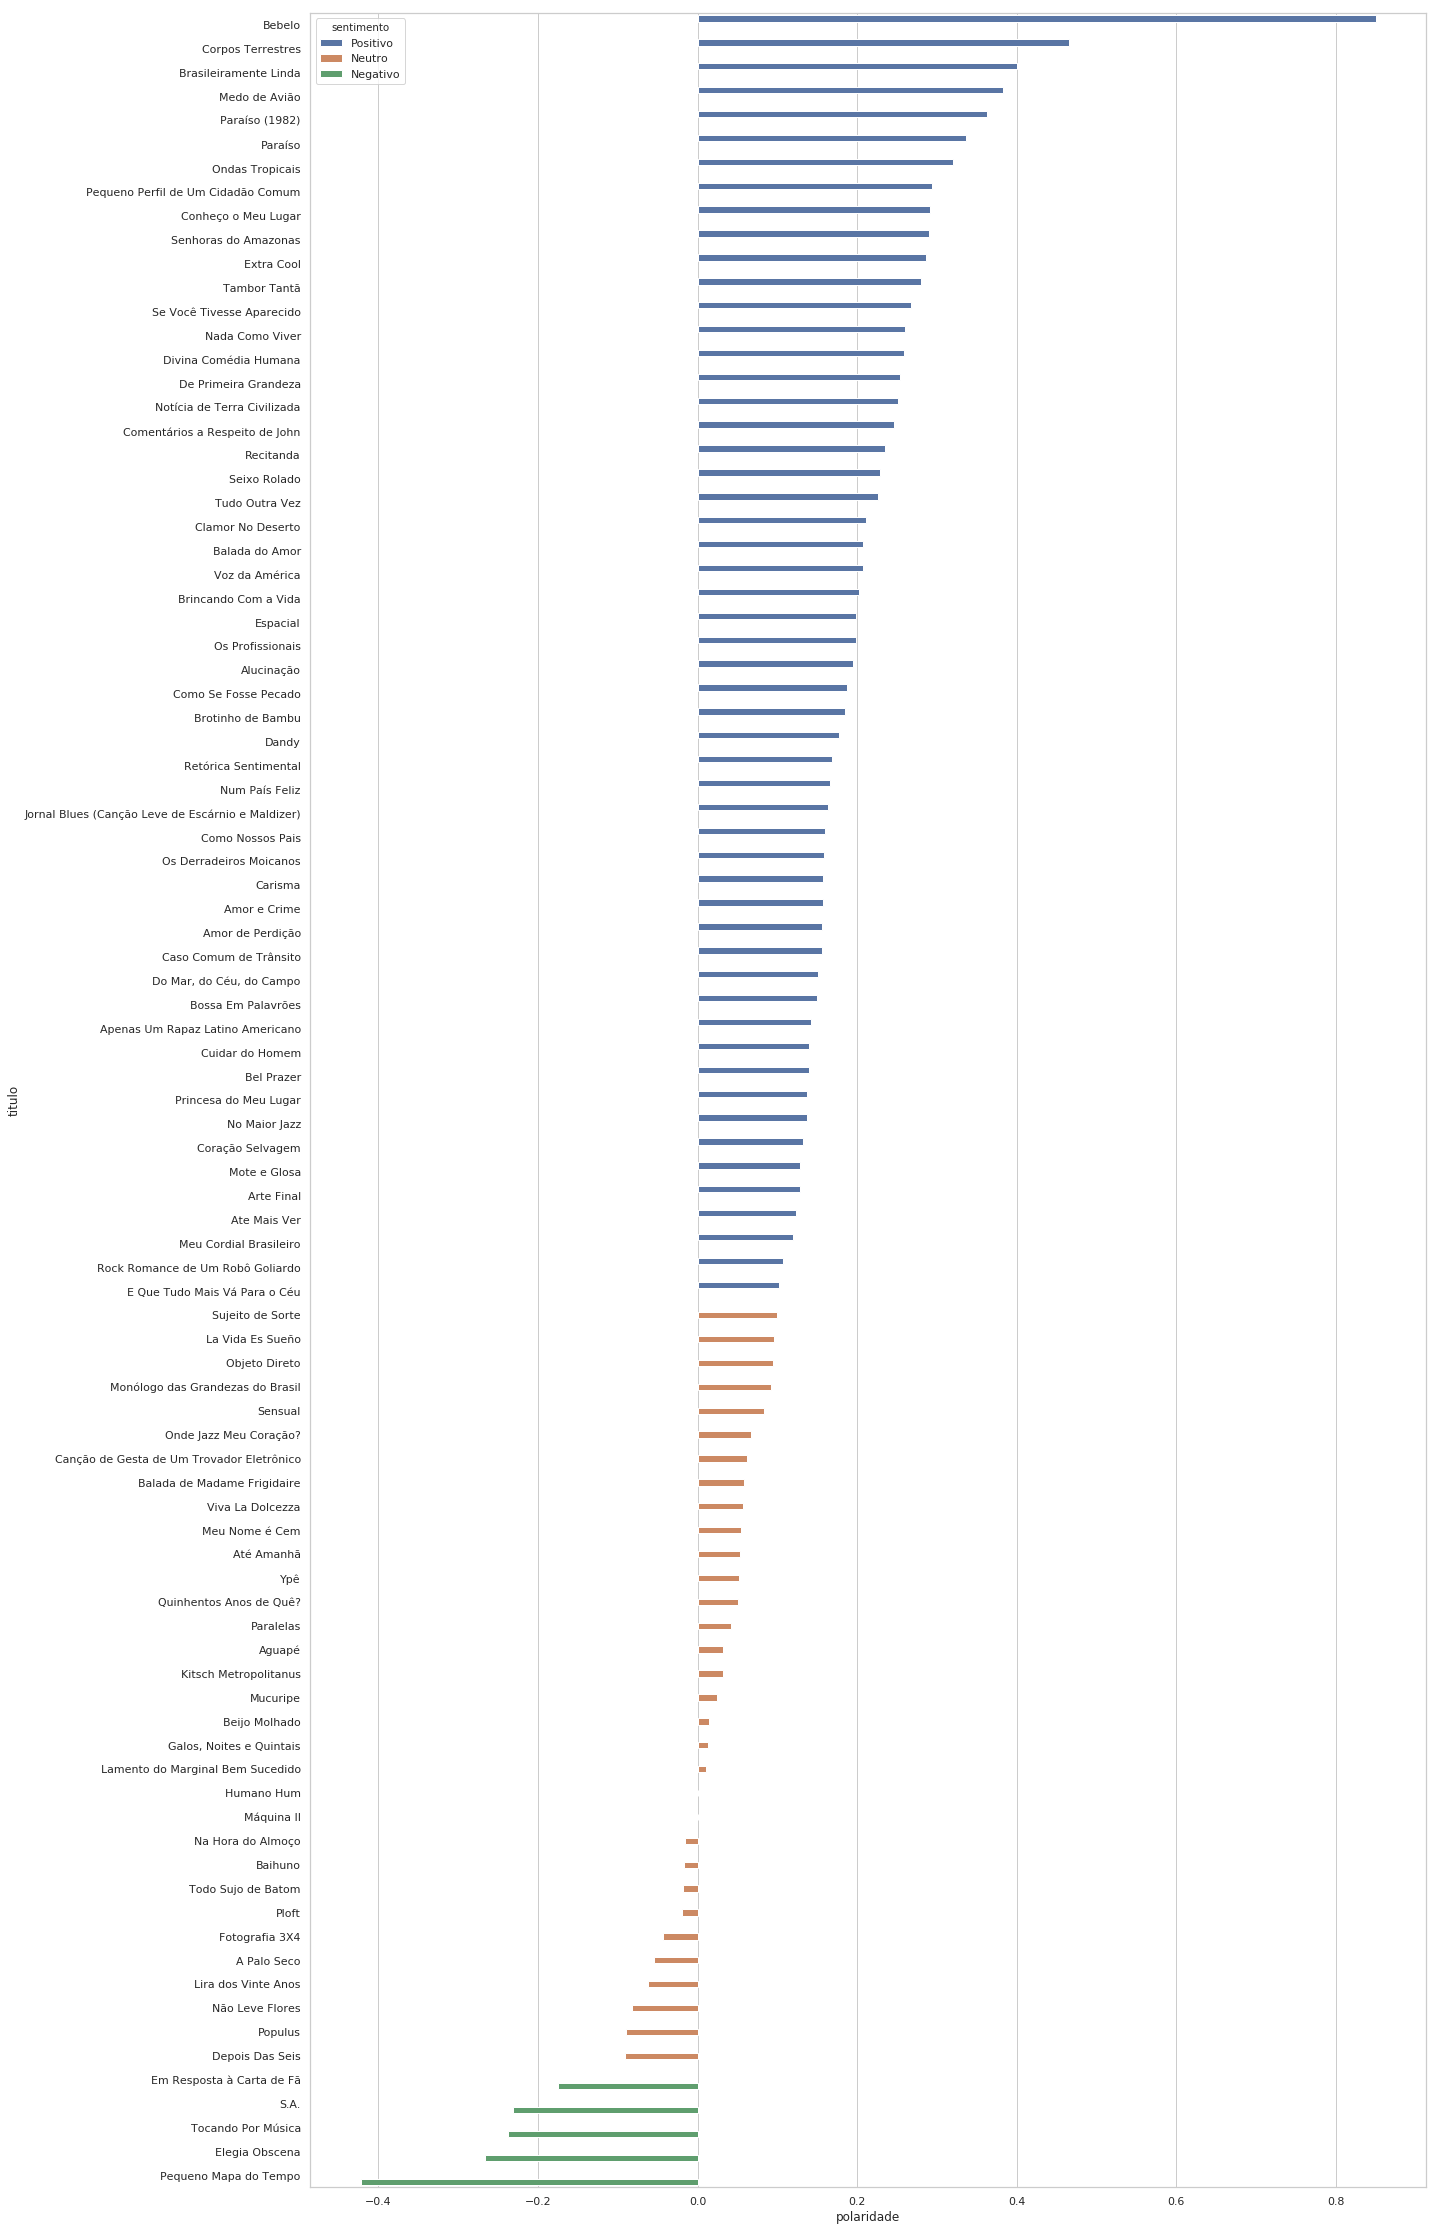

In [167]:
plt.figure(figsize=(20, 40))
sns.barplot(y="titulo", x="polaridade", hue = "sentimento", data=df.sort_values(by='polaridade', ascending=False))

In [168]:
def discretizar_polaridade(pol):
    if pol >= 0.1:
        return 'Positivo'
    elif pol >= -0.1:
        return 'Neutro'
    else:
        return 'Negativo'

In [169]:
def get_color_from_sentimento(sent):
    if sent == 'Neutro':
        return 'tan'
    elif sent == 'Positivo':
        return 'steelblue'
    else:
        return 'firebrick'

In [170]:
df['sentimento'] = df.apply(lambda x: discretizar_polaridade(x['polaridade']),axis=1)

In [171]:
df.head()

,titulo,maisTocada,letra,tamanho,polaridade,subjetividade,sentimento,keywords,x,y
0,A Palo Seco,1,Se você vier me perguntar por onde andei No te...,195,-0.054545,0.463636,Neutro,"quero, canto, torto",7.072263,-3.692765
1,Aguapé,0,Capineiro de meu pai Não me cortes meus cabelo...,257,0.032345,0.354072,Neutro,"nada, sentada, estrada",6.900632,-5.588358
2,Alucinação,1,Eu não estou interessado Em nenhuma teoria Em ...,370,0.194898,0.600680,Positivo,"coisas, nenhuma, amar",6.871804,-2.529769
3,Amor de Perdição,0,"Entrar, ficar em ti Tem sido o meu melhor peri...",213,0.156212,0.514444,Positivo,"amor, paz, deixa",5.582899,-2.192232
4,Amor e Crime,0,"Amor, não há amor Existem só provas de amor Ma...",122,0.156944,0.661905,Positivo,"amor, tudo, provas",5.220195,-2.353262


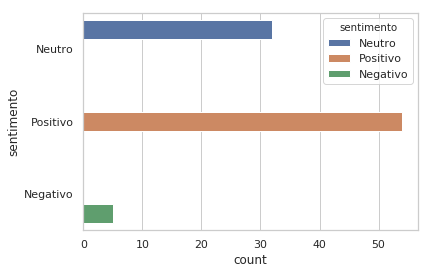

In [172]:
sns.countplot(y="sentimento", hue="sentimento", data=df)

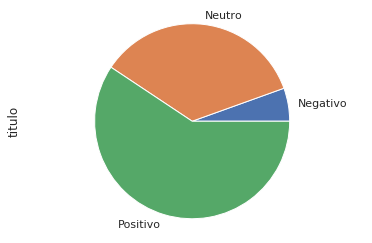

<Figure size 1440x1440 with 0 Axes>

In [190]:
df.titulo.groupby(df.sentimento).count().plot(kind='pie')
plt.autopct='%1.1f%%'
plt.axis('equal')
plt.figure(figsize=(20, 20))
plt.show()

In [200]:
list(df.titulo.groupby(df.sentimento).count().index)

['Negativo', 'Neutro', 'Positivo']

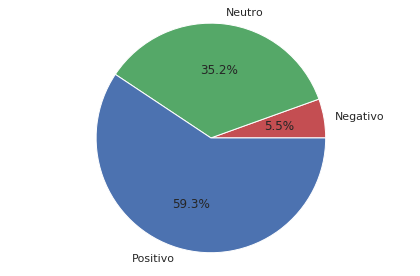

In [201]:
# Pie chart
labels = list(df.titulo.groupby(df.sentimento).count().index)
sizes = list(df.titulo.groupby(df.sentimento).count())
colors = ['r', 'g', 'b']
# only "explode" the 2nd slice (i.e. 'Hogs')
explode = (0, 0.1, 0, 0)  
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', colors = colors)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

<Figure size 1440x1440 with 0 Axes>

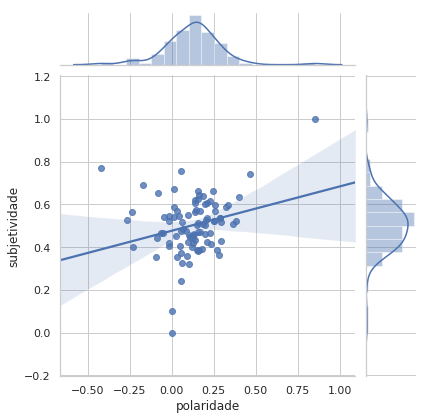

In [173]:
plt.figure(figsize=(20, 20))
sns.jointplot(x="polaridade", y="subjetividade", kind="reg", data=df);

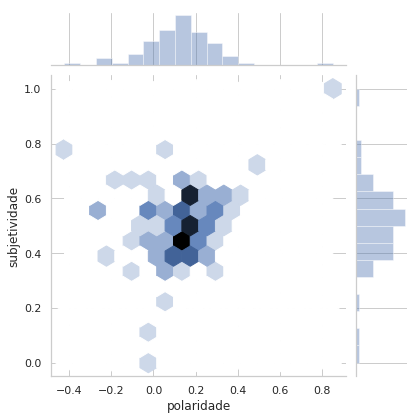

In [174]:
sns.jointplot(x="polaridade", y="subjetividade", kind = 'hex', data=df);

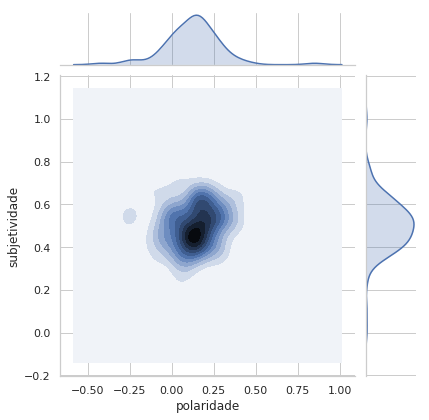

In [175]:
sns.jointplot(x="polaridade", y="subjetividade", kind = 'kde', data=df);

# Tópicos ocultos (Latent Semantic Analysis)

In [176]:
from gensim.models import LsiModel
from gensim import corpora

In [177]:
from collections import defaultdict
from gensim import corpora

documents = [
    "Human machine interface for lab abc computer applications",
    "A survey of user opinion of computer system response time",
    "The EPS user interface management system",
    "System and human system engineering testing of EPS",
    "Relation of user perceived response time to error measurement",
    "The generation of random binary unordered trees",
    "The intersection graph of paths in trees",
    "Graph minors IV Widths of trees and well quasi ordering",
    "Graph minors A survey",
]

documents = list(df['letra'])

# remove common words and tokenize
stoplist = set('for a of the and to in'.split())
texts = [
    [word for word in document.lower().split() if word not in stopwords]
    for document in documents
]

# remove words that appear only once
frequency = defaultdict(int)
for text in texts:
    for token in text:
        frequency[token] += 1

texts = [
    [token for token in text if frequency[token] > 1]
    for text in texts
]

dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

In [178]:
from gensim import models

tfidf = models.TfidfModel(corpus)  # step 1 -- initialize a model
corpus_tfidf = tfidf[corpus]

In [179]:
lsi_model = models.LsiModel(corpus_tfidf, id2word=dictionary, num_topics=10)  # initialize an LSI transformation
corpus_lsi = lsi_model[corpus_tfidf]  # create a double wrapper over the original corpus: bow->tfidf->fold-in-lsi

In [180]:
lsi_model.print_topics(num_words=3)

[(0, '0.157*"quero" + 0.141*"tudo" + 0.131*"amor"'),
 (1, '0.601*"nada," + 0.476*"nada" + 0.151*"viver"'),
 (2, '0.488*"medo" + 0.322*"medo," + 0.139*"destina"'),
 (3, '0.189*"medo" + -0.176*"rock" + -0.155*"rock,"'),
 (4, '0.257*"medo" + 0.229*"medo," + -0.152*"hoje"'),
 (5, '0.351*"novo" + 0.166*"bem," + 0.158*"diga"'),
 (6, '0.215*"novo" + 0.131*"ai!" + -0.123*"canção"'),
 (7, '-0.197*"oh," + -0.183*"amor" + 0.159*"vá"'),
 (8, '-0.295*"novo" + -0.159*"oh," + 0.156*"fez"'),
 (9, '-0.153*"rock," + -0.143*"novo" + 0.129*"verdes"')]

# Salvando datasets 

In [181]:
df.head()

,titulo,maisTocada,letra,tamanho,polaridade,subjetividade,sentimento,keywords,x,y
0,A Palo Seco,1,Se você vier me perguntar por onde andei No te...,195,-0.054545,0.463636,Neutro,"quero, canto, torto",7.072263,-3.692765
1,Aguapé,0,Capineiro de meu pai Não me cortes meus cabelo...,257,0.032345,0.354072,Neutro,"nada, sentada, estrada",6.900632,-5.588358
2,Alucinação,1,Eu não estou interessado Em nenhuma teoria Em ...,370,0.194898,0.600680,Positivo,"coisas, nenhuma, amar",6.871804,-2.529769
3,Amor de Perdição,0,"Entrar, ficar em ti Tem sido o meu melhor peri...",213,0.156212,0.514444,Positivo,"amor, paz, deixa",5.582899,-2.192232
4,Amor e Crime,0,"Amor, não há amor Existem só provas de amor Ma...",122,0.156944,0.661905,Positivo,"amor, tudo, provas",5.220195,-2.353262


In [182]:
df.to_csv('belchior.csv',index=False) #básico, contendo titulo da musica, letra, mais tocada, pol, sub e sentimento
df_freq.to_csv('belchior_dist_freq.csv',index=False) #token, e quantas vezes ocorre e em quais músicas
bigram_df.to_csv('belchior_bigrams.csv',index=False) #bigramas
df_tdm.to_csv('belchior_tf_idf.csv',index=False) #matriz termo documento, vetorizado em tf-idf
df_similar.to_csv('belchior_similaridade.csv',index=True) #matriz de similaridade cosseno entre documentos
df_scatter.to_csv('belchior_2D.csv',index=False) #redução de dimensionalidade em 2D através de UMAP da vetorização dos documentos